# Mackenzie's Exploration of Data
Mackenzie's quick exploration of different relationships between WHO data. 

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dfAfrica = pd.read_csv("africa.csv")
dfAmericas = pd.read_csv("americas.csv")
dfEMed = pd.read_csv("mediterranean.csv")
dfEurope = pd.read_csv("europe.csv")
dfSEAsia = pd.read_csv("asia.csv")
dfWPacific = pd.read_csv("pacific.csv")

df = [dfAfrica, dfAmericas, dfEMed, dfEurope, dfSEAsia, dfWPacific]

result = pd.concat(df)

print result.head()

               GHO PUBLISHSTATE  YEAR REGION    AGEGROUP   SEX  Display Value  \
0  LIFE_0000000033    PUBLISHED  1990    AFR  AGE100PLUS  BTSX           60.0   
1  LIFE_0000000035    PUBLISHED  2013    AFR    AGE85-89  BTSX            4.1   
2  LIFE_0000000035    PUBLISHED  2000    AFR    AGE55-59  BTSX           18.8   
3  LIFE_0000000032    PUBLISHED  2012    AFR    AGE45-49  FMLE         3411.0   
4  LIFE_0000000035    PUBLISHED  1990    AFR    AGE25-29   MLE           38.8   

      Numeric  Low  High  Comments  
0    60.01235  NaN   NaN       NaN  
1     4.14085  NaN   NaN       NaN  
2    18.76440  NaN   NaN       NaN  
3  3410.96100  NaN   NaN       NaN  
4    38.79806  NaN   NaN       NaN  


We got data. Now need to fix the weird symbols in Age column.

In [34]:
def cleanData(data):
    data.AGEGROUP.replace(("AGE100PLUS", "AGE95-99", "AGE90-94", "AGE85-89", 
                             "AGE80-84", "AGE75-79", "AGE70-74", "AGE65-69", 
                             "AGE60-64", "AGE55-59", "AGE50-54", "AGE45-49", 
                             "AGE40-44", "AGE35-39", "AGE30-34", "AGE25-29", 
                             "AGE20-24", "AGE15-19", "AGE10-14", "AGE5-9", 
                             "AGE1-4", "AGELT1"), 
                          (100.0, 95.0, 90.0, 85.0, 80.0, 75.0, 70.0, 65.0, 60.0, 55.0, 50.0, 
                             45.0, 40.0, 35.0, 30.0, 25.0, 20.0, 15.0, 10.0, 5.0, 1.0, 0.5), 
                          inplace = True)
    
    data.SEX.replace(("BTSX", "FMLE", "MLE"), (2, 1, 0), inplace = True)
    
    # V not a continuous value, just for ease of referencing this column
    data.GHO.replace(("LIFE_0000000029", "LIFE_0000000030", "LIFE_0000000031", 
                      "LIFE_0000000032", "LIFE_0000000033", "LIFE_0000000034",
                      "LIFE_0000000035"),
                     (29, 30, 31, 32, 33, 34, 35), inplace = True)
    
    data.drop(["PUBLISHSTATE", "Low", "High", "Comments", "Display Value"], 
              inplace = True, axis = 1)
    return data

Meanings of values in GHO column:

29  nMx - age-specific death rate between ages x and x+n

30  nqx - probability of dying between ages x and x+n

31  lx - number of people left alive at age x

32  ndx - number of people dying between ages x and x+n

33  nLx - person-years lived between ages x and x+n

34  Tx - person-years lived above age x

35  ex - expectation of life at age x

In [35]:
cleans = cleanData(result)
print cleans.head()

   GHO  YEAR REGION  AGEGROUP  SEX     Numeric
0   33  1990    AFR       100    2    60.01235
1   35  2013    AFR        85    2     4.14085
2   35  2000    AFR        55    2    18.76440
3   32  2012    AFR        45    1  3410.96100
4   35  1990    AFR        25    0    38.79806


First I'm looking at grouping by WHO region and year. I'm interested in trends across years by region. I'm also going to try and isolate this to GHO category 35, the life expectancy. I'm curious in which regions someone can expect to live longer, and how this has evolved over time. 

In [36]:
cleans.groupby(['REGION','YEAR','GHO','AGEGROUP','SEX']).mean()


Numeric
REGION YEAR GHO AGEGROUP SEX          
AFR    1990 29  0.5      0     0.12220
                         1     0.10310
                         2     0.11275
                1.0      0     0.02051
                         1     0.01964
                         2     0.02008
                5.0      0     0.00678
                         1     0.00657
                         2     0.00667
                10.0     0     0.00347
                         1     0.00344
                         2     0.00345
                15.0     0     0.00435
                         1     0.00388
                         2     0.00412
                20.0     0     0.00643
                         1     0.00494
                         2     0.00568
                25.0     0     0.00748
                         1     0.00618
                         2     0.00683
                30.0     0     0.00828
                         1     0.00698
                         2     0.00762
                35.0     0     0.00956
                         1     0.00801
                         2     0.00878
                40.0     0     0.01135
                         1     0.00906
                         2     0.01019
...                                ...
WPR    2013 35  55.0     0    23.19104
                         1    26.47949
                         2    24.81079
                60.0     0    19.13731
                         1    22.15896
                         2    20.64060
                65.0     0    15.42357
                         1    18.12318
                         2    16.78740
                70.0     0    12.09318
                         1    14.41054
                         2    13.29094
                75.0     0     9.21246
                         1    11.12355
                         2    10.23840
                80.0     0     6.80038
                         1     8.31782
                         2     7.66147
                85.0     0     4.97558
                         1     6.14232
                         2     5.69064
                90.0     0     3.52535
                         1     4.43578
                         2     4.13592
                95.0     0     2.75148
                         1     3.43853
                         2     3.26290
                100.0    0     2.31193
                         1     2.70181
                         2     2.63238

[11088 rows x 1 columns]

In [80]:
lifeExpec=result[result.GHO==35]#only looking at life expectancy values
afOnly = lifeExpec[lifeExpec.REGION=='AFR']
bSexLE= afOnly[afOnly.SEX == 2] # only looking at both sexes life expectancy
#I want a pcolor graph where x axis is year and y axis is age and color bar is numeric. Different graphs for different WHO regions


sorted_ages= bSexLE.AGEGROUP.sort_values()
print bSexLE.Numeric.value_counts()

42.73843    1
34.89505    1
10.30924    1
55.42321    1
46.30478    1
46.37251    1
50.61477    1
42.18530    1
60.50480    1
36.53708    1
13.28700    1
7.75550     1
7.15559     1
13.23078    1
50.17085    1
54.05158    1
10.26868    1
48.08845    1
5.62871     1
22.02081    1
23.83541    1
7.72732     1
28.59871    1
22.08470    1
2.81992     1
23.67893    1
9.29364     1
3.01211     1
30.90201    1
50.17334    1
           ..
58.66320    1
5.60888     1
44.03409    1
25.37685    1
2.32954     1
58.40390    1
59.26025    1
18.76440    1
27.30796    1
15.47016    1
38.30448    1
34.89443    1
2.20392     1
2.90374     1
38.23720    1
54.99350    1
1.86740     1
3.84154     1
3.73076     1
1.76083     1
18.52391    1
27.54161    1
16.52860    1
5.15630     1
20.07386    1
16.60823    1
29.21952    1
42.17673    1
61.18550    1
15.15660    1
Name: Numeric, dtype: int64


<type 'numpy.ndarray'>


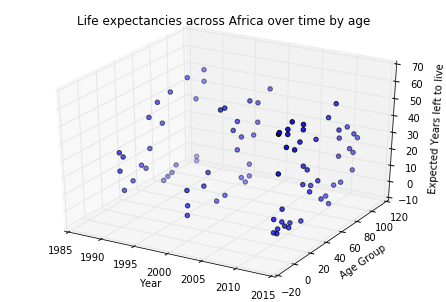

In [94]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

yearMesh, ageMesh= np.meshgrid(bSexLE.YEAR.values,sorted_ages.values)


ax = Axes3D(plt.gcf())
print type(bSexLE.Numeric.values)
ax.scatter(
    bSexLE.YEAR.values,
    sorted_ages.values,
    bSexLE.Numeric.values
    
)


ax.set_xlabel('Year')
ax.set_ylabel('Age Group')
ax.set_zlabel('Expected Years left to live')

plt.title('Life expectancies across Africa over time by age')

plt.show()

I still need to rotate this scatter plot to look at a more favorable angle. Right now, the points are also shaded by depth. The good news is that I have an effective way to represent trends over time!